# Bigmart Sales Predection :

Big Data Mart Sales Problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


https://github.com/dsrscientist/bigdatamart_rep



In [1]:
## import essential libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## as we have two dataset train and test. so load 2dataset :
train=pd.read_csv('bigdatamart_train.csv')
test=pd.read_csv('bigdatamart_test.csv')


In [3]:
## cheking the firt five records of train dataset :
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
## checking the first five records of test dataset :
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
## let's check the shape of the train dataset :
train.shape

(8523, 12)

In [6]:
## let's check the shape of test dataset :
test.shape

(5681, 11)

In [7]:
## now let us combained the two dataset :
data=pd.concat([train,test],ignore_index=True)

In [8]:
## chech the firt five records of the dataset :
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
## shape of the final combained dataset :
data.shape

(14204, 12)

In [10]:
## total information of the data :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [11]:
## checking the null values present in the dataset :
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [12]:
## let's check the unique values from the catagorical columns :
print(data['Item_Identifier'].unique())
print()
print(data['Item_Fat_Content'].unique())
print()
print(data['Item_Type'].unique())
print()
print(data['Outlet_Size'].unique())
print()
print(data['Outlet_Identifier'].unique())
print()
print(data['Outlet_Location_Type'].unique())
print()
print(data['Outlet_Type'].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

['Medium' nan 'High' 'Small']

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

['Tier 1' 'Tier 3' 'Tier 2']

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [13]:
## filling the mising values :
data['Item_Weight']=data.fillna(data['Item_Weight'].mean())

In [14]:
## checking the count of outlet_size :
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [15]:
## filling the values :
data['Outlet_Size']=data.Outlet_Size.fillna('Medium')

In [16]:
## filling the mising values :
data['Item_Outlet_Sales']=data.fillna(data['Item_Outlet_Sales'].mean())

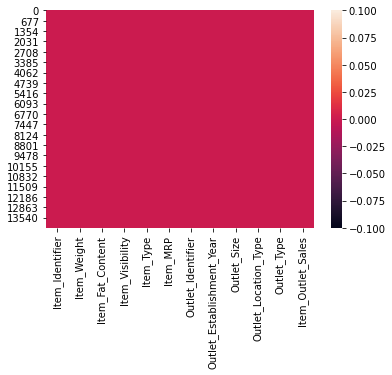

In [17]:
## check the mising values also by heatmap :
sns.heatmap(data.isnull())

In [18]:
## describe the data :
data.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,14204.000000,14204.000000,14204.000000
mean,0.065953,141.004977,1997.830681
std,0.051459,62.086938,8.371664
min,0.000000,31.290000,1985.000000
25%,0.027036,94.012000,1987.000000
50%,0.054021,142.247000,1999.000000
75%,0.094037,185.855600,2004.000000
max,0.328391,266.888400,2009.000000


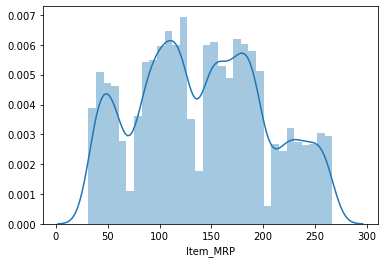

In [19]:
## Univariate analysis of the MRP :
sns.distplot(data['Item_MRP'])

In [20]:
## import libraries :
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
## use for loop to convert catagorical values to numerical by using label encoder :
list=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']
for i in list:
    data[i]=le.fit_transform(data[i])

In [22]:
## checking the head :
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,FDA15,1,0.016047,4,249.8092,9,1999,1,0,1,156
1,8,DRC01,2,0.019278,14,48.2692,3,2009,1,2,2,8
2,662,FDN15,1,0.016760,10,141.6180,9,1999,1,0,1,662
3,1121,FDX07,2,0.000000,6,182.0950,0,1998,1,2,0,1121
4,1297,NCD19,1,0.000000,9,53.8614,1,1987,0,2,1,1297


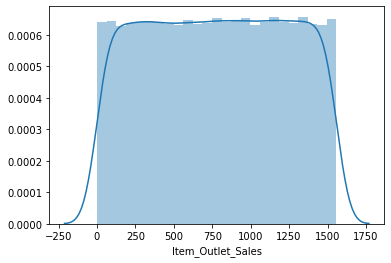

In [23]:
## Univariate analysi :
sns.distplot(data['Item_Outlet_Sales'])

In [24]:
## Statistics impletation :
data.describe()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,780.193889,1.369121,0.065953,7.229372,141.004977,4.722473,1997.830681,1.170867,1.112856,1.201281,780.193889
std,449.619658,0.643300,0.051459,4.213471,62.086938,2.837101,8.371664,0.600306,0.812755,0.796543,449.619658
min,0.000000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,0.000000
25%,391.000000,1.000000,0.027036,4.000000,94.012000,2.000000,1987.000000,1.000000,0.000000,1.000000,391.000000
50%,782.000000,1.000000,0.054021,6.000000,142.247000,5.000000,1999.000000,1.000000,1.000000,1.000000,782.000000
75%,1169.000000,2.000000,0.094037,10.000000,185.855600,7.000000,2004.000000,2.000000,2.000000,1.000000,1169.000000
max,1558.000000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,1558.000000


In [25]:
## corrilation between the columns : Statisticts analysis :
dfr=data.corr()
dfr

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,-0.096220,-0.040775,-0.012048,0.010743,-0.001089,-0.002954,0.002581,-0.002473,-0.004532,1.000000
Item_Fat_Content,-0.096220,1.000000,0.033864,-0.121140,-0.006195,-0.001733,-0.004135,-0.007084,-0.002518,-0.002380,-0.096220
Item_Visibility,-0.040775,0.033864,1.000000,-0.035646,-0.006351,-0.106181,-0.083678,0.064836,-0.017362,-0.165726,-0.040775
Item_Type,-0.012048,-0.121140,-0.035646,1.000000,0.043948,0.001126,0.003061,-0.002608,0.002083,0.004305,-0.012048
Item_MRP,0.010743,-0.006195,-0.006351,0.043948,1.000000,-0.000555,0.000141,-0.001018,0.000838,0.000136,0.010743
Outlet_Identifier,-0.001089,-0.001733,-0.106181,0.001126,-0.000555,1.000000,0.079047,0.504580,-0.716151,0.099899,-0.001089
Outlet_Establishment_Year,-0.002954,-0.004135,-0.083678,0.003061,0.000141,0.079047,1.000000,0.193392,-0.089328,-0.122519,-0.002954
Outlet_Size,0.002581,-0.007084,0.064836,-0.002608,-0.001018,0.504580,0.193392,1.000000,-0.614300,-0.201505,0.002581
Outlet_Location_Type,-0.002473,-0.002518,-0.017362,0.002083,0.000838,-0.716151,-0.089328,-0.614300,1.000000,0.467251,-0.002473
Outlet_Type,-0.004532,-0.002380,-0.165726,0.004305,0.000136,0.099899,-0.122519,-0.201505,0.467251,1.000000,-0.004532


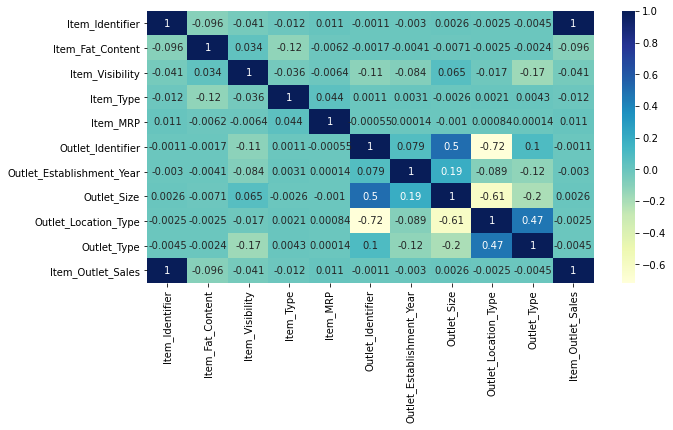

In [26]:
## corrilation heatmap :
plt.figure(figsize=(10,5))
sns.heatmap(dfr,annot=True,cmap='YlGnBu')

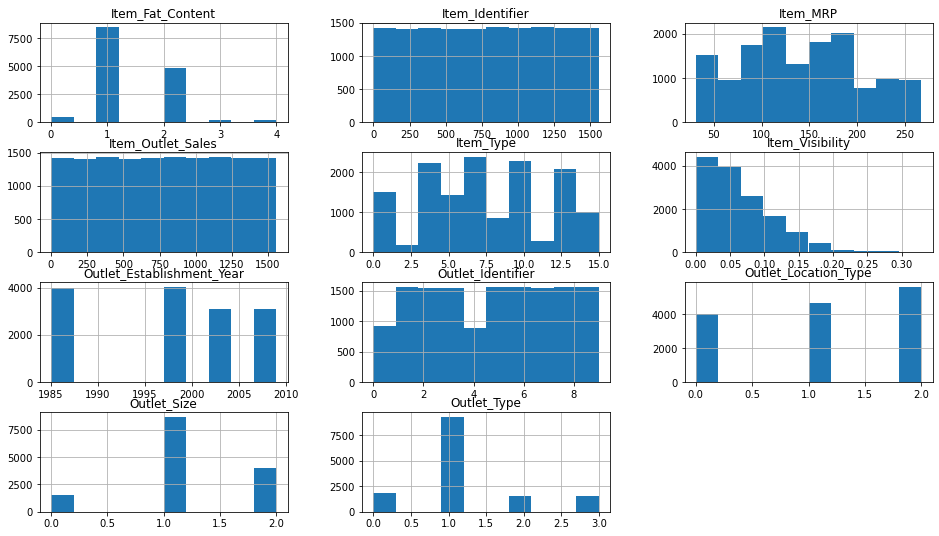

In [27]:
## Histogram representaion of the data :
data.hist(figsize=(16,9))
plt.show()

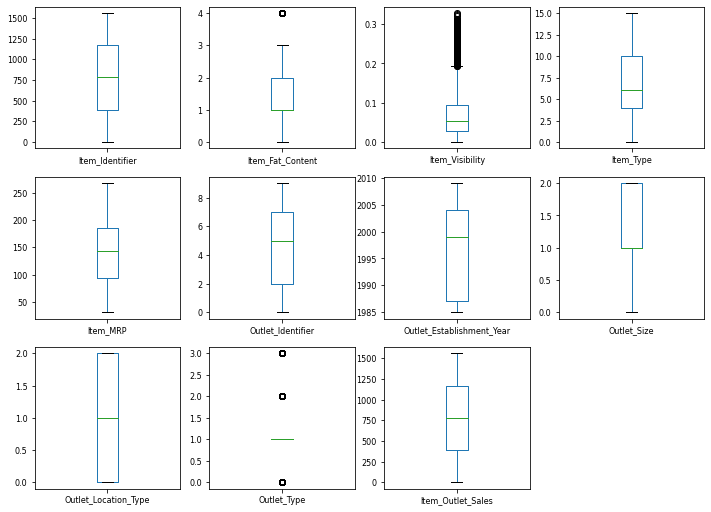

In [28]:
## box plot representaion for checking outliers :
data.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))
plt.show()

In [29]:
## checking the skewed values :
data.skew()

Item_Identifier             -0.004897
Item_Fat_Content             0.996640
Item_Visibility              1.195175
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales           -0.004897
dtype: float64

In [30]:
## droping the columns :
data.drop('Item_Fat_Content',axis=1,inplace=True)

In [31]:
## droping the columns :
data.drop('Outlet_Type',axis=1,inplace=True)

In [32]:
## droping the columns:
data.drop('Item_Visibility',axis=1,inplace=True)

In [33]:
## now checking the first five records of the final dataset :
data.head()

,Item_Identifier,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,156,FDA15,4,249.8092,9,1999,1,0,156
1,8,DRC01,14,48.2692,3,2009,1,2,8
2,662,FDN15,10,141.6180,9,1999,1,0,662
3,1121,FDX07,6,182.0950,0,1998,1,2,1121
4,1297,NCD19,9,53.8614,1,1987,0,2,1297


In [34]:
## droping the columns :
data.drop('Item_Weight',axis=1,inplace=True)

In [35]:
## droping the columns :
data.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [36]:
## head of the dataset :
data.head()

,Item_Identifier,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,156,4,249.8092,9,1,0,156
1,8,14,48.2692,3,1,2,8
2,662,10,141.6180,9,1,0,662
3,1121,6,182.0950,0,1,2,1121
4,1297,9,53.8614,1,0,2,1297


In [37]:
## again checking the skewed values :
data.skew()

Item_Identifier        -0.004897
Item_Type               0.099574
Item_MRP                0.130728
Outlet_Identifier      -0.059994
Outlet_Size            -0.087077
Outlet_Location_Type   -0.209053
Item_Outlet_Sales      -0.004897
dtype: float64

In [38]:
## spliting the data into X and Y (input and output) :
X=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']

In [39]:
X.shape

(14204, 6)

In [40]:
y.shape

(14204,)

In [41]:
## model selection :
from sklearn import linear_model ## importing required libraries from skit-learn :
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=5,scoring='r2').mean()

1.0

In [42]:
## let us split the data into train_test_split form sklearn :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)
predm=lr.predict(X_test)
predm

array([ 959.,  209., 1275., ..., 1393., 1511.,  440.])

In [43]:
## importing the esential libraries :
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('r2 score:',r2_score(y_test,predm))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,predm)))

r2 score: 1.0
RMSE is: 2.383041502858564e-13


# RandomForestRegressor

In [44]:
## importing RandomForestRegressor :
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_accuracy=round(rf.score(X_train,y_train)*100)
rf_accuracy

100.0

# DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_accuracy=round(dt.score(X_train,y_train)*100)
dt_accuracy

100.0

In [46]:
## we will go with RandomForestRegressor :
y_pred=rf.predict(X_test)
y_pred

array([ 958.98,  209.02, 1275.  , ..., 1393.01, 1511.01,  439.99])

In [47]:
## final import joblib for saving are model :
import joblib
joblib.dump(data,'bigmart_joblib')

['bigmart_joblib']

####Thank you!!!
####Cheers